## Plastic Production and Waste Management

"Plastic", i.e. polymer production began in the 1930s due to WWII supply shortages. As more research was done and plastics technology advanced, more of them were commercialized and made to substitute more expensive natural materials. More things are created as disposable, one time use plastics. Plastics are everywhere around us, in our living space, our waste, and our ecosystem, both land and water. Polymers come in many types and forms, as macroplastics larger than 0.5cm and microplastics less than 0.5cm, as polyethylene and polypropylene which can be divided further as subsets of 7 resin numbers (1. PETE, 2. HDPE, 3. PVC, 4. LDPE, 5. PP, 6. PS, 7. Other). Discarded plastics linger for an incredible amount of time given how long they were actually used for. Just to name some common items, plastic bags take 2-3 decades, nylon fabric takes 3-4 decades, plastic cups take 5 decades, and plastic bottles and disposable diapers take 450 years. Mismanaged disposal of plastics result in plastics that leach into ecosystems, affecting wildlife with painful deaths and ultimately ourselves as microplastics travel up the food chain. With that said, let's see cool visual data of plastics!

### tldr: Plastics, we got too much of it and we have data of it. So let's see charts

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import xlrd
%matplotlib inline

In [2]:
dfGlobalPlasticProduction = pd.read_csv('global-plastics-production.csv',header=0)
dfGlobalPlasticFate = pd.read_csv('global-plastic-fate.csv',header=0)
dfUSPlasticManagementInThousandMs = pd.read_excel('plastic-management.xlsx',header=0)
dfUSPlasticManagement = dfUSPlasticManagementInThousandMs.apply(lambda x: x*10**3 if x.name not in ['Year'] else x)

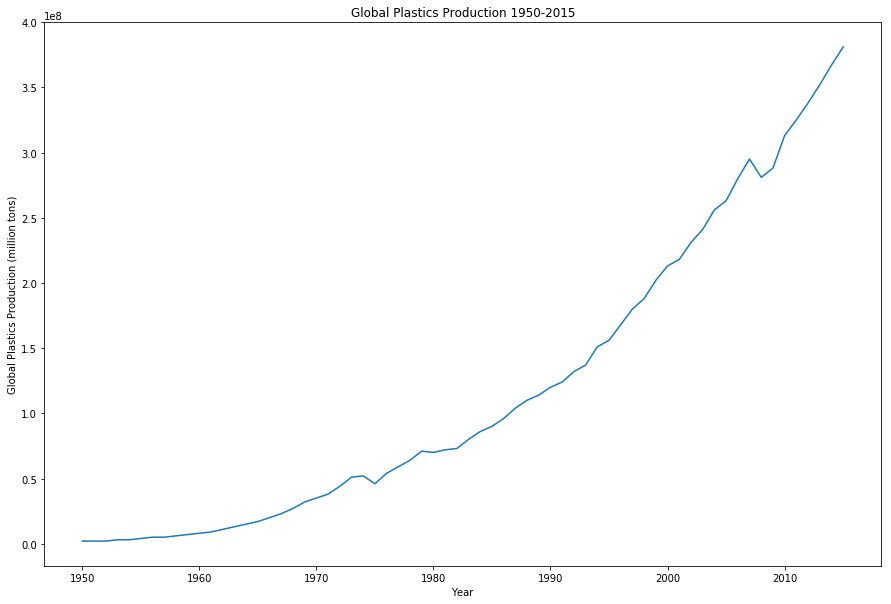

In [3]:
fig = plt.figure(figsize=(15,10))
plt.plot(dfGlobalPlasticProduction['Year'], dfGlobalPlasticProduction['Global plastics production (million tons)'])
plt.xlabel('Year')
plt.ylabel('Global Plastics Production (million tons)')
plt.title('Global Plastics Production 1950-2015')
plt.show()

Here we can see the rising rate at which we are producing more plastics which will persist for decades and centuries to come. Integrate that and we can begin to understand the scale at which we have to manage remaining and new plastics.

In [4]:
values = integrate.cumtrapz(dfGlobalPlasticProduction['Year'], dfGlobalPlasticProduction['Global plastics production (million tons)'], initial=0)
print(values[-1])

756183500000.0


In total, 756,183,500,000 tons have been generated.

### Global Plastic Fate

What is the fate of plastic globally? Most are discarded, some incinerated, and even less are recycled. Discarded plastics persist still from the 1950s, and we are only accumulating more until there is no space for landfill. Meanwhile, incineration causes emissions which increase occurrence of cancer and respiratory symptoms. And, there are still plastics which are mismanaged and end up in waters.

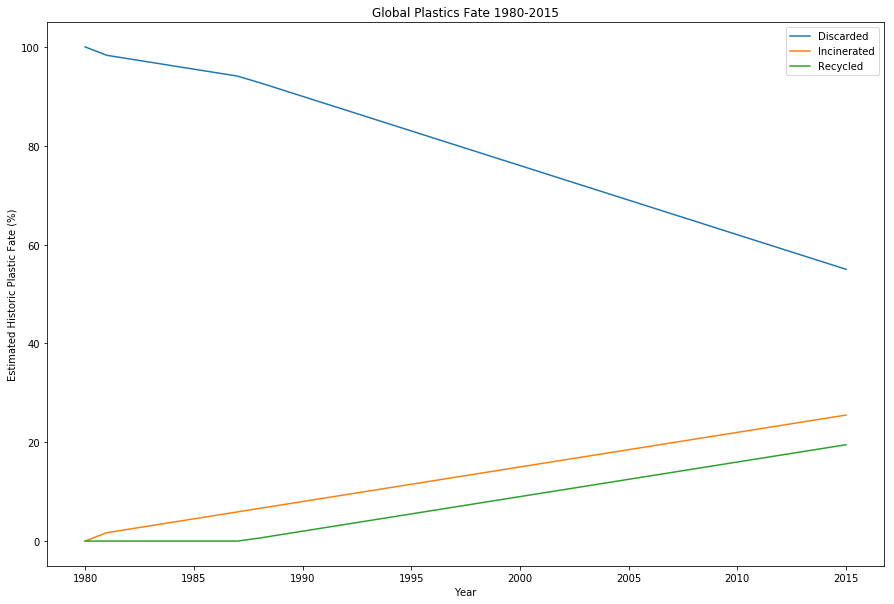

In [5]:
dfGlobalPlasticFate.groupby('Entity')
fig = plt.figure(figsize=(15,10))
for entity in dfGlobalPlasticFate['Entity'].unique():
    plt.plot(dfGlobalPlasticFate[dfGlobalPlasticFate['Entity'] == entity]['Year'], dfGlobalPlasticFate[dfGlobalPlasticFate['Entity'] == entity]['Estimated historic plastic fate (%)'], label = entity)

plt.xlabel('Year')
plt.ylabel('Estimated Historic Plastic Fate (%)')
plt.title('Global Plastics Fate 1980-2015')
plt.legend()
plt.show()

### US Plastic Management

In the US alone, plastics are generated, landfilled, recycled, and combusted/incinerated as shown below.

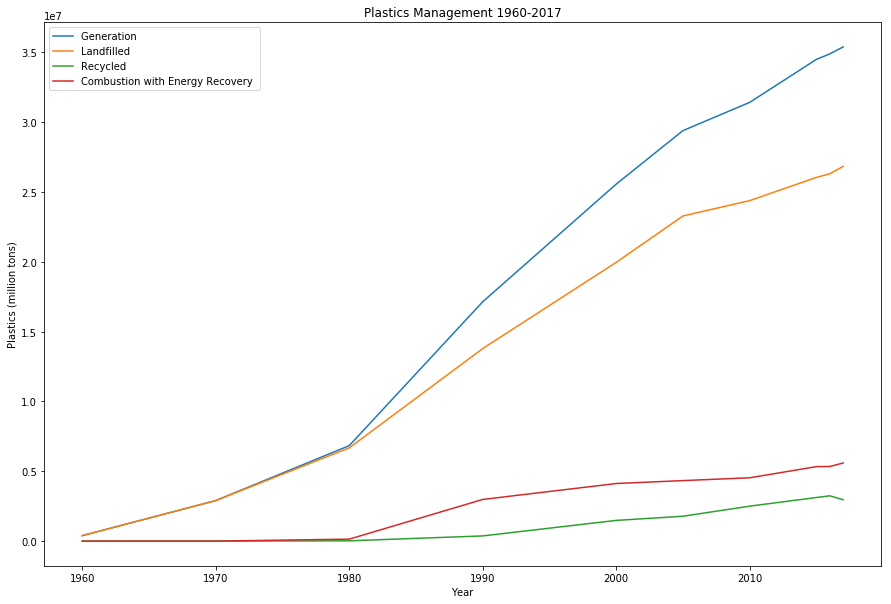

In [6]:
fig = plt.figure(figsize=(15,10))
labels = ['Generation ', 'Landfilled ', 'Recycled ', 'Combustion with Energy Recovery ']
for i in labels:
    plt.plot(dfUSPlasticManagement['Year'], dfUSPlasticManagement[i], label=i)
    
plt.xlabel('Year')
plt.ylabel('Plastics (million tons)')
plt.title('Plastics Management 1960-2017')
plt.legend()
plt.show()

### Global Plastic Production By Sector

Plastic is produced by the following sectors.

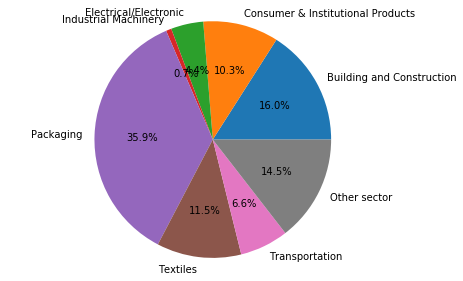

In [7]:
labels = ['Building and Construction', 'Consumer & Institutional Products', 'Electrical/Electronic', 'Industrial Machinery', 'Packaging', 'Textiles', 'Transportation', 'Other sector']
sizes = [65,42,18,3,146,47,27,59]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()

### Global Plastic Waste By Sector

Plastic waste is generated by the following sectors.

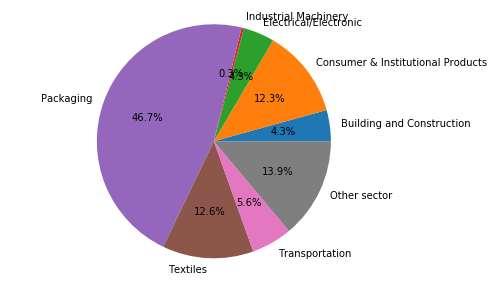

In [8]:
labels = ['Building and Construction', 'Consumer & Institutional Products', 'Electrical/Electronic', 'Industrial Machinery', 'Packaging', 'Textiles', 'Transportation', 'Other sector']
sizes = [13, 37, 13, 1, 141, 38, 17, 42]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()

### Cool data, I guess, but now what?

What can we do as consumers? Generate less waste by limiting use of disposable plastics and use reusable products whenever possible. Recycling is *not* the solution; with sorting plastics and manufactured plastics which are too difficult to separate by grade or type, most plastics end up being disposed anyway.

We can also push for/support policymakers who curb plastic producers with minimum recycled content, single-use plastics bans, and higher cent deposits for bottles.

We live in a city where we can dispose of something, and it's "out of sight, out of mind", but the reality is that it is persisting somewhere with an environmental cost we *will* pay. 

Please be mindful, and thank you for coming to my Ted talk.

<img src="oof.jpg">